In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy
import seaborn

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.sample(18)


User_ID Product_ID Gender    Age  Occupation City_Category  \
192734  1005771  P00074642      M  26-35           7             A   
548635  1003996  P00371644      M  18-25          14             C   
534751  1004329  P00214642      F  26-35          14             B   
45361   1001010  P00315842      M  26-35           0             A   
367092  1002507  P00089142      M  26-35           4             A   
502406  1005396  P00199442      M  26-35           6             C   
537234  1004682  P00185042      M  26-35           7             B   
529826  1003624  P00101942      M  26-35          12             B   
187276  1004906  P00048142      M  51-55          17             B   
11909   1001785  P00242742      M  18-25           4             B   
176256  1003299  P00120542      F  26-35           4             B   
490497  1003589  P00363242      F  46-50           0             B   
227925  1005111  P00200842      M  36-45           2             B   
223005  1004354  P00206042      M  36-45          14             B   
242570  1001383  P00044442      F  26-35           7             A   
337642  1003967  P00048442      F  18-25           2             A   
467926  1000048  P00178942      M  26-35           4             B   
339196  1004192  P00102642      M  36-45          17             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
192734                          1               0                   5   
548635                          1               0                  20   
534751                          0               1                  11   
45361                           1               0                   5   
367092                          0               1                   5   
502406                          0               0                   5   
537234                          3               1                   5   
529826                          0               1                   8   
187276                          1               1                   1   
11909                           2               0                   1   
176256                          2               0                   8   
490497                          1               1                   1   
227925                          1               1                   8   
223005                          2               0                   5   
242570                          1               0                   1   
337642                          1               0                   5   
467926                          3               1                   5   
339196                          3               0                   4   

        Product_Category_2  Product_Category_3  Purchase  
192734                 9.0                14.0      5193  
548635                 NaN                 NaN       599  
534751                13.0                16.0      1589  
45361                  NaN                 NaN      3545  
367092                 NaN                 NaN      8653  
502406                 9.0                 NaN      6928  
537234                14.0                 NaN      7019  
529826                17.0                 NaN      9867  
187276                16.0                 NaN     11452  
11909                  2.0                 9.0     15651  
176256                14.0                 NaN      8117  
490497                 2.0                 9.0      4523  
227925                 NaN                 NaN      5855  
223005                 NaN                 NaN      8843  
242570                16.0                 NaN     15808  
337642                14.0                 NaN      5285  
467926                 8.0                 NaN      7163  
339196                 8.0                 9.0      2140

In [27]:
#formatting the display of numbers in jupyter from exponential to float
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
data.describe()

User_ID  Occupation  Marital_Status  Product_Category_1  \
count   550,068.00  550,068.00      550,068.00          550,068.00   
mean  1,003,028.84        8.08            0.41                5.40   
std       1,727.59        6.52            0.49                3.94   
min   1,000,001.00        0.00            0.00                1.00   
25%   1,001,516.00        2.00            0.00                1.00   
50%   1,003,077.00        7.00            0.00                5.00   
75%   1,004,478.00       14.00            1.00                8.00   
max   1,006,040.00       20.00            1.00               20.00   

       Product_Category_2  Product_Category_3   Purchase  
count          376,430.00          166,821.00 550,068.00  
mean                 9.84               12.67   9,263.97  
std                  5.09                4.13   5,023.07  
min                  2.00                3.00      12.00  
25%                  5.00                9.00   5,823.00  
50%                  9.00               14.00   8,047.00  
75%                 15.00               16.00  12,054.00  
max                 18.00               18.00  23,961.00

In [7]:
data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [8]:
data.groupby('Age').Marital_Status.value_counts().to_frame()


Marital_Status
Age   Marital_Status                
0-17  0                        15102
18-25 0                        78544
      1                        21116
26-35 0                       133296
      1                        86291
36-45 0                        66377
      1                        43636
46-50 1                        33011
      0                        12690
51-55 1                        27662
      0                        10839
55+   1                        13621
      0                         7883

In [9]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [10]:
data['Product_Category_2'].isnull().value_counts()

False    376430
True     173638
Name: Product_Category_2, dtype: int64

In [11]:
data.loc[(data.Product_Category_2.isnull()),'Product_Category_2']=0

In [12]:
data['Product_Category_2'].isnull().value_counts()

False    550068
Name: Product_Category_2, dtype: int64

In [13]:
data['Product_Category_3'].isnull().value_counts()

True     383247
False    166821
Name: Product_Category_3, dtype: int64

In [14]:
data.loc[(data.Product_Category_3.isnull()),'Product_Category_3']=0

In [15]:
data['Product_Category_3'].isnull().value_counts()

False    550068
Name: Product_Category_3, dtype: int64

In [16]:
data.groupby('City_Category').Marital_Status.value_counts().to_frame()


Marital_Status
City_Category Marital_Status                
A             0                        91173
              1                        56547
B             0                       136721
              1                        94452
C             0                        96837
              1                        74338

Converting all strings to numbers


In [17]:
#Stay in Current in city in years
data.loc[(data.Stay_In_Current_City_Years) == '4+', 'Stay_In_Current_City_Years'] = 4

#Gender
data.loc[(data.Gender) == 'M', 'Gender'] = 1
data.loc[(data.Gender)== 'F', 'Gender'] = 0

#Age
data.loc[(data.Age) == '0-17', 'Age'] = 0
data.loc[(data.Age) == '18-25', 'Age'] = 1
data.loc[(data.Age) == '26-35', 'Age'] = 2
data.loc[(data.Age) == '36-45', 'Age'] = 3
data.loc[(data.Age) == '46-50', 'Age'] = 4
data.loc[(data.Age) == '51-55', 'Age'] = 5
data.loc[(data.Age) == '55+', 'Age'] = 6

#City_Catgegory
data.loc[(data.City_Category) == 'A', 'City_Category'] = 0
data.loc[(data.City_Category) == 'B', 'City_Category'] = 1
data.loc[(data.City_Category) == 'C', 'City_Category'] = 2
data


User_ID Product_ID Gender Age  Occupation City_Category  \
0       1000001  P00069042      0   0          10             0   
1       1000001  P00248942      0   0          10             0   
2       1000001  P00087842      0   0          10             0   
3       1000001  P00085442      0   0          10             0   
4       1000002  P00285442      1   6          16             2   
5       1000003  P00193542      1   2          15             0   
6       1000004  P00184942      1   4           7             1   
7       1000004  P00346142      1   4           7             1   
8       1000004   P0097242      1   4           7             1   
9       1000005  P00274942      1   2          20             0   
10      1000005  P00251242      1   2          20             0   
11      1000005  P00014542      1   2          20             0   
12      1000005  P00031342      1   2          20             0   
13      1000005  P00145042      1   2          20             0   
14      1000006  P00231342      0   5           9             0   
15      1000006  P00190242      0   5           9             0   
16      1000006   P0096642      0   5           9             0   
17      1000006  P00058442      0   5           9             0   
18      1000007  P00036842      1   3           1             1   
19      1000008  P00249542      1   2          12             2   
20      1000008  P00220442      1   2          12             2   
21      1000008  P00156442      1   2          12             2   
22      1000008  P00213742      1   2          12             2   
23      1000008  P00214442      1   2          12             2   
24      1000008  P00303442      1   2          12             2   
25      1000009  P00135742      1   2          17             2   
26      1000009  P00039942      1   2          17             2   
27      1000009  P00161442      1   2          17             2   
28      1000009  P00078742      1   2          17             2   
29      1000010  P00085942      0   3           1             1   
...         ...        ...    ...  ..         ...           ...   
550038  1005995  P00375436      0   3           1             2   
550039  1005996  P00371644      0   2           0             1   
550040  1005997  P00370853      0   2           7             0   
550041  1006000  P00371644      1   4          17             1   
550042  1006002  P00371644      1   5           0             2   
550043  1006003  P00370293      0   4          17             2   
550044  1006004  P00370853      0   2          15             2   
550045  1006005  P00371644      0   2           5             2   
550046  1006006  P00375436      0   0           0             2   
550047  1006009  P00372445      0   2          12             2   
550048  1006010  P00371644      1   3           0             2   
550049  1006011  P00375436      1   3          15             2   
550050  1006012  P00371644      1   3          15             2   
550051  1006013  P00375436      0   2          20             2   
550052  1006016  P00375436      1   4           1             1   
550053  1006017  P00371644      0   3           7             1   
550054  1006018  P00370293      1   3           1             2   
550055  1006019  P00372445      1   2           0             0   
550056  1006022  P00375436      1   2          17             2   
550057  1006023  P00370853      1   2           0             2   
550058  1006024  P00372445      1   2          12             0   
550059  1006025  P00370853      0   2           1             1   
550060  1006026  P00371644      1   3           6             2   
550061  1006029  P00372445      0   2           1             2   
550062  1006032  P00372445      1   4           7             0   
550063  1006033  P00372445      1   5          13             1   
550064  1006035  P00375436      0   2           1             2   
550065  1006036  P00375436      0   2          15      

In [18]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

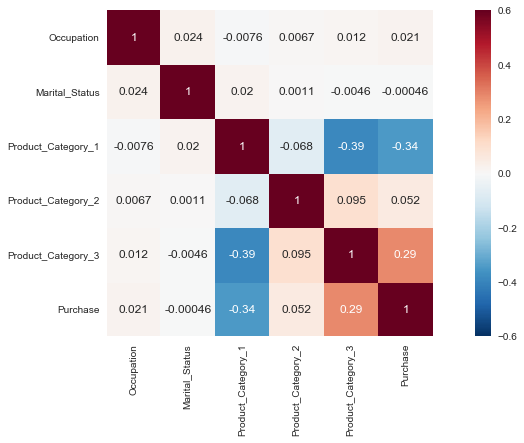

In [19]:
plt.figure(figsize=(15, 6))
seaborn.heatmap(data.drop('User_ID', 1).corr(), vmax=0.6, square=True, annot=True)
plt.show()

In [20]:
#dropping unnecessaet feature
data = data.drop('Product_ID', 1)
data


User_ID Gender Age  Occupation City_Category  \
0       1000001      0   0          10             0   
1       1000001      0   0          10             0   
2       1000001      0   0          10             0   
3       1000001      0   0          10             0   
4       1000002      1   6          16             2   
5       1000003      1   2          15             0   
6       1000004      1   4           7             1   
7       1000004      1   4           7             1   
8       1000004      1   4           7             1   
9       1000005      1   2          20             0   
10      1000005      1   2          20             0   
11      1000005      1   2          20             0   
12      1000005      1   2          20             0   
13      1000005      1   2          20             0   
14      1000006      0   5           9             0   
15      1000006      0   5           9             0   
16      1000006      0   5           9             0   
17      1000006      0   5           9             0   
18      1000007      1   3           1             1   
19      1000008      1   2          12             2   
20      1000008      1   2          12             2   
21      1000008      1   2          12             2   
22      1000008      1   2          12             2   
23      1000008      1   2          12             2   
24      1000008      1   2          12             2   
25      1000009      1   2          17             2   
26      1000009      1   2          17             2   
27      1000009      1   2          17             2   
28      1000009      1   2          17             2   
29      1000010      0   3           1             1   
...         ...    ...  ..         ...           ...   
550038  1005995      0   3           1             2   
550039  1005996      0   2           0             1   
550040  1005997      0   2           7             0   
550041  1006000      1   4          17             1   
550042  1006002      1   5           0             2   
550043  1006003      0   4          17             2   
550044  1006004      0   2          15             2   
550045  1006005      0   2           5             2   
550046  1006006      0   0           0             2   
550047  1006009      0   2          12             2   
550048  1006010      1   3           0             2   
550049  1006011      1   3          15             2   
550050  1006012      1   3          15             2   
550051  1006013      0   2          20             2   
550052  1006016      1   4           1             1   
550053  1006017      0   3           7             1   
550054  1006018      1   3           1             2   
550055  1006019      1   2           0             0   
550056  1006022      1   2          17             2   
550057  1006023      1   2           0             2   
550058  1006024      1   2          12             0   
550059  1006025      0   2           1             1   
550060  1006026      1   3           6             2   
550061  1006029      0   2           1             2   
550062  1006032      1   4           7             0   
550063  1006033      1   5          13             1   
550064  1006035      0   2           1             2   
550065  1006036      0   2          15             1   
550066  1006038      0   6           1             2   
550067  1006039      0   4           0             1   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                               4               0                   8   
5                               3               0                   1   
6                       

In [21]:
#importing packages
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [22]:
data


User_ID Gender Age  Occupation City_Category  \
0       1000001      0   0          10             0   
1       1000001      0   0          10             0   
2       1000001      0   0          10             0   
3       1000001      0   0          10             0   
4       1000002      1   6          16             2   
5       1000003      1   2          15             0   
6       1000004      1   4           7             1   
7       1000004      1   4           7             1   
8       1000004      1   4           7             1   
9       1000005      1   2          20             0   
10      1000005      1   2          20             0   
11      1000005      1   2          20             0   
12      1000005      1   2          20             0   
13      1000005      1   2          20             0   
14      1000006      0   5           9             0   
15      1000006      0   5           9             0   
16      1000006      0   5           9             0   
17      1000006      0   5           9             0   
18      1000007      1   3           1             1   
19      1000008      1   2          12             2   
20      1000008      1   2          12             2   
21      1000008      1   2          12             2   
22      1000008      1   2          12             2   
23      1000008      1   2          12             2   
24      1000008      1   2          12             2   
25      1000009      1   2          17             2   
26      1000009      1   2          17             2   
27      1000009      1   2          17             2   
28      1000009      1   2          17             2   
29      1000010      0   3           1             1   
...         ...    ...  ..         ...           ...   
550038  1005995      0   3           1             2   
550039  1005996      0   2           0             1   
550040  1005997      0   2           7             0   
550041  1006000      1   4          17             1   
550042  1006002      1   5           0             2   
550043  1006003      0   4          17             2   
550044  1006004      0   2          15             2   
550045  1006005      0   2           5             2   
550046  1006006      0   0           0             2   
550047  1006009      0   2          12             2   
550048  1006010      1   3           0             2   
550049  1006011      1   3          15             2   
550050  1006012      1   3          15             2   
550051  1006013      0   2          20             2   
550052  1006016      1   4           1             1   
550053  1006017      0   3           7             1   
550054  1006018      1   3           1             2   
550055  1006019      1   2           0             0   
550056  1006022      1   2          17             2   
550057  1006023      1   2           0             2   
550058  1006024      1   2          12             0   
550059  1006025      0   2           1             1   
550060  1006026      1   3           6             2   
550061  1006029      0   2           1             2   
550062  1006032      1   4           7             0   
550063  1006033      1   5          13             1   
550064  1006035      0   2           1             2   
550065  1006036      0   2          15             1   
550066  1006038      0   6           1             2   
550067  1006039      0   4           0             1   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                               4               0                   8   
5                               3               0                   1   
6                       

In [28]:
# making our matrix and vector
X = data.iloc[:, :-1].values #matrix (independent feature)
y = data.iloc[:, 9].values #vector (dependent feature)

In [29]:
#formatting the display of numbers in jupyter from exponential to float
pd.options.display.float_format = '{:,.2f}'.format

In [31]:
# Encoding Age Feature (7 categories)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

#formatting the display of numbers in jupyter from exponential to float
pd.options.display.float_format = '{:,.2f}'.format

#Avoiding Dummy Variable Trap
X = X[:, 1:]
# 6 feat + 10 = 16 features
X

MemoryError: 

In [25]:
# numpy.set_printoptions(threshold=numpy.inf)
#print(X)

In [26]:
#Encoding City_Category (3) ---it's on postion 9, 5(former dummy)+4(it's normal postion)== 9
labelencoder = LabelEncoder()
X[:, 9] = labelencoder.fit_transform(X[:, 9])
onehotencoder = OneHotEncoder(categorical_features = [9])
X = onehotencoder.fit_transform(X).toarray()

#Avoiding Dummy Variable Trap
X = X[:, 1:]